# Analyzing data to find validity in employee complaints

### List of Complaints
- New employees complained that more tenured employees were lazy and unproductive.
- More tenured employees complained that the newer employees didn't focus and were therefore unproductive.
- Managers were worried that remote workers might be less productive.
- In-person employees found it impossible to focus and be productive when their desk was in the open plan area.
- Many people said they had so much administrative work to do they could only be truly productive if they worked overtime.
- Everyone complained that there were too many meetings.

## Productivity Score's Relationship With 3 Features
Most of these complaints mention the employees being unproductive because of certain factors. To get to the bottom of this, let's create some scatterplots that display the relationship with 'HoursWorked', 'FocusScore', and 'YearsAtCompany'. And compare it to 'ProductivityScore'. Let's import our database and the libraries we will be using.

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

df = pd.read_csv('Employee_productivity.csv')
df.head()

,HoursWorked,FocusScore,ProductivityScore,Department,YearsAtCompany,TeamMeetingsPerWeek,DeskLocation
0,42.4,6.3,3127.96,Engineering,17,0,Open Plan
1,34.0,7.2,4742.60,HR,8,6,Private Office
2,47.2,5.6,2044.73,Sales,15,3,Remote
3,38.4,9.0,5818.92,HR,5,6,Private Office
4,36.4,2.5,1841.31,Sales,9,6,Remote


In [86]:
def apply_and_plot_polynomial_regression(degree, X_train, X_test, X_label, y_train, y_test, Y_label, title):
    # Create polynomial features
    poly = PolynomialFeatures(degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    # Fit a linear regression model
    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    # Predict and evaluate
    y_pred = model.predict(X_test_poly)
    r2 = r2_score(y_test, y_pred)

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.scatter(X_train, y_train, alpha=0.5, color='darkgreen')
    plt.scatter(X_test, y_test, alpha=0.5, color='darkgreen')
    
    # Plot the model
    X_fit = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
    y_fit = model.predict(poly.transform(X_fit))
    plt.plot(X_fit, y_fit, color='red', label='Line of Best Fit')

    plt.title(title)
    plt.xlabel(X_label)
    plt.ylabel(Y_label)
    plt.legend()
    plt.grid(True)
    plt.show()

    print(f"R-squared: {round(r2, 2)}")

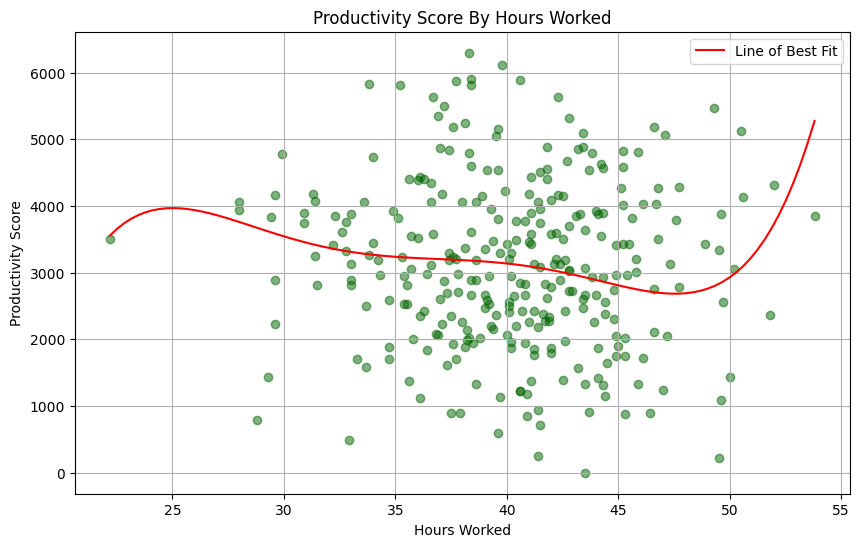

R-squared: -0.11


In [87]:
######## Hours Worked ########

#Scatterplot of Productivity Score vs Hours Worked

# Preparing the data
X = df[['HoursWorked']].values
y = df['ProductivityScore'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply and plot polynomial regression for different degrees
apply_and_plot_polynomial_regression(5, X_train, X_test, 'Hours Worked', y_train, y_test, 'Productivity Score', 'Productivity Score By Hours Worked')

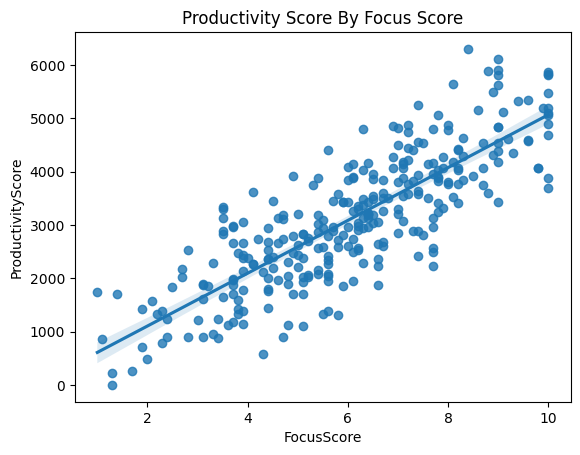

R-squared: 0.68


In [85]:
######## Focus Score ########

#Scatterplot of Productivity Score vs Focus Score
sns.regplot(x='FocusScore', y='ProductivityScore', data=df)
plt.title('Productivity Score By Focus Score')
plt.show()

#Calculate r-squared value
X = sm.add_constant(df['FocusScore'])
y = df['ProductivityScore']

model = sm.OLS(y, X).fit()
print(f"R-squared: {round(model.rsquared, 2)}")

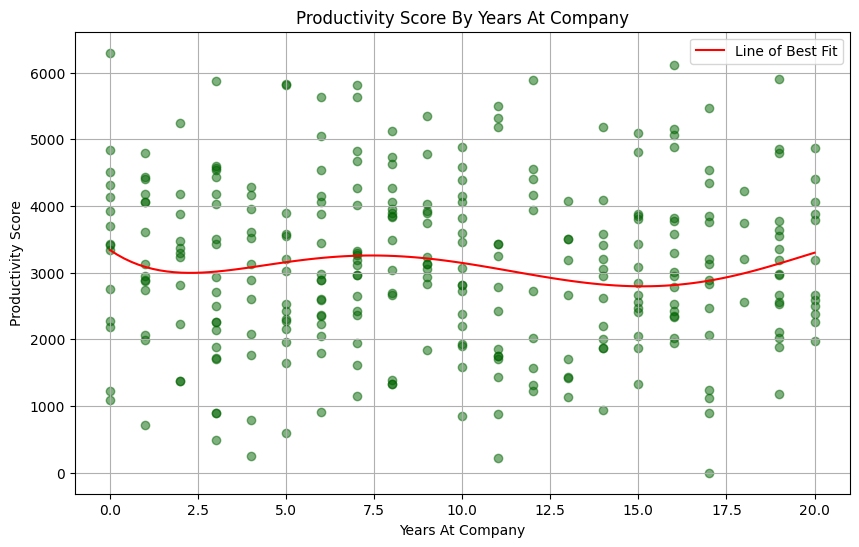

R-squared: -0.03


In [88]:
######## Years At Company ########

#Scatterplot of Productivity Score vs Years At Company

# Preparing the data
X = df[['YearsAtCompany']].values
y = df['ProductivityScore'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply and plot polynomial regression for different degrees
apply_and_plot_polynomial_regression(5, X_train, X_test, 'Years At Company', y_train, y_test, 'Productivity Score', 'Productivity Score By Years At Company')

### Results From The 3 Visuals
**Focus Score** - Visually, the points are not scattered all over the place and show a positive upward trend between the two variables. This shows that as focus scores go up, so does productivity. The r-squared value supports this even more, being around 68%.

**Years At Company** - The relationship is non-existent. The points are scattered all over the place and the line of best fit does not seem to capture any real pattern. The r-squared value is in the negatives (-3%), which clearly tells us that there is nothing to see here.

**Hours Worked** - Our graph does not showcase a clear relationship between the two. The only thing clear is the non-existence of one. The points are scattered all over the place and the line of best fit does not display a pattern. The r-squared value is around -11% which supports this even more.

Looking through all these features, **Focus Score** has the strongest relationship with Productivity Score.

## Relationship With Other Features
Let's check on the other features to see their relationship status with 'ProductivityScore'. We will use the FocusScore scatterplot and add extra elements to it to get more insight into our findings.

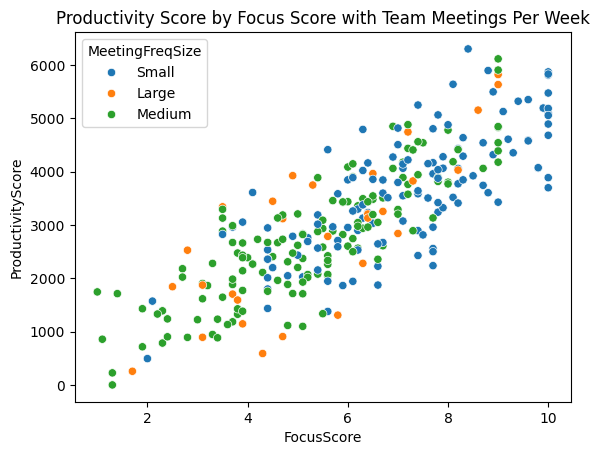

R-squared: 0.68


In [112]:
######## Team Meetings Per Week ########

df.loc[df['TeamMeetingsPerWeek'] <= 2, 'MeetingFreqSize'] = 'Small'
df.loc[(df['TeamMeetingsPerWeek'] >= 3) & (df['TeamMeetingsPerWeek'] <= 5), 'MeetingFreqSize'] = 'Medium'
df.loc[df['TeamMeetingsPerWeek'] >= 6, 'MeetingFreqSize'] = 'Large'

#Scatterplot of Productivity Score vs Focus Score with Team Meetings Per Week
sns.scatterplot(x='FocusScore', y='ProductivityScore', data=df, hue='MeetingFreqSize')
plt.title('Productivity Score by Focus Score with Team Meetings Per Week')
plt.show()

#Calculate r-squared value
X = sm.add_constant(df[['FocusScore', 'TeamMeetingsPerWeek']])
y = df['ProductivityScore']

model = sm.OLS(y, X).fit()
print(f"R-squared: {round(model.rsquared, 2)}")

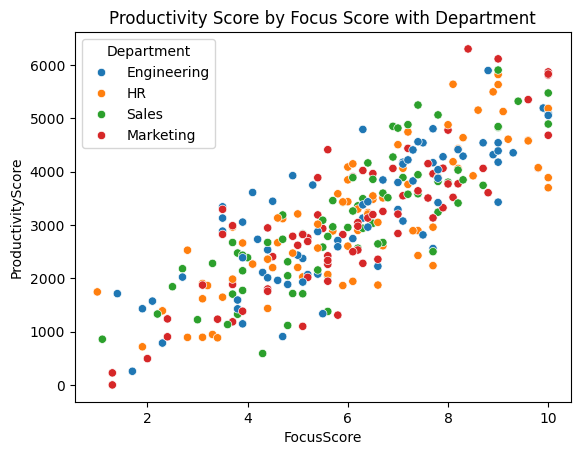

R-squared: 0.68


In [108]:
######## Department ########

#Scatterplot of Productivity Score vs Focus Score with department
sns.scatterplot(x='FocusScore', y='ProductivityScore', data=df, hue='Department')
plt.title('Productivity Score by Focus Score with Department')
plt.show()

#Calculate r-squared value
df['DepartmentID'] = df['Department'].map({'Engineering': 1, 'HR': 2, 'Sales': 3, 'Marketing': 4})
X = sm.add_constant(df[['FocusScore', 'DepartmentID']])
y = df['ProductivityScore']

model = sm.OLS(y, X).fit()
print(f"R-squared: {round(model.rsquared, 2)}")

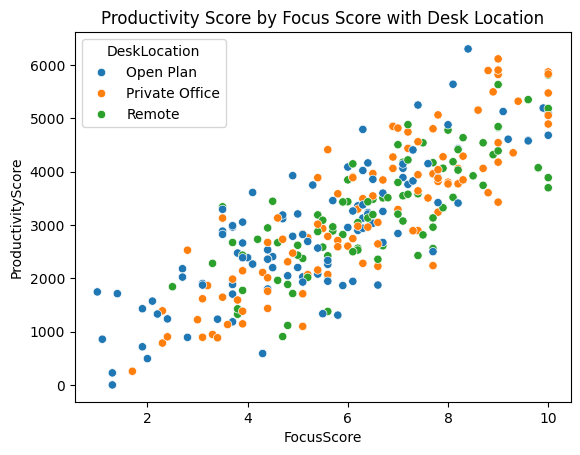

R-squared: 0.68


In [106]:
######## Desk Location ########

#Scatterplot of Productivity Score vs Focus Score with Desk Location
sns.scatterplot(x='FocusScore', y='ProductivityScore', data=df, hue='DeskLocation')
plt.title('Productivity Score by Focus Score with Desk Location')
plt.show()

#Calculate r-squared value
df['DeskLocationID'] = df['DeskLocation'].map({'Open Plan': 1, 'Private Office': 2, 'Remote': 3})
X = sm.add_constant(df[['FocusScore', 'DeskLocationID']])
y = df['ProductivityScore']

model = sm.OLS(y, X).fit()
print(f"R-squared: {round(model.rsquared, 2)}")

### Results From The Other Visuals
**Team Meetings Per Week** - At first glance you may think there's no relationship, but look at how the employees who attend a small amount of meetings tend to stay higher up on the line more often compared to the other employees. The r-squared value is 68% so nothing changes much.

**Department** - The chart shows no clear relationship between the two variables. Everything is pretty equally distributed across the line. R-square is 68% so that's still the same.

**Desk Location** - The remote locations are more closely grouped together compared to the other desk locations. The r-squared value is still 68%.

## Recommendations

I would suggest lowering the amount of meetings per week for employees who have more than 4. Trim the fluff and make sure every meeting is important and effiecent. Also maybe we can try to have employees work remote and see if it gives a more consistent focus score for more employees.